# OpenPrefEval: Dead Simple Open LLM Evaluation

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
# !pip install peft bitsandbytes -q
from matplotlib import pyplot as plt
from transformers import AutoTokenizer, AutoModelForCausalLM, AutoConfig
from open_pref_eval.datasets import get_default_datasets
from open_pref_eval.evaluation import evaluate_models, evaluate_model, evaluate
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [3]:
datasets = get_default_datasets(100)
datasets

README.md:   0%|          | 0.00/4.32k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/107k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/47.2k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/43.3k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1512 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/652 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/606 [00:00<?, ? examples/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.12M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/402k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/372k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/13737 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/4807 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/4271 [00:00<?, ? examples/s]

train-00000-of-00001.parquet:   0%|          | 0.00/527k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/73.3k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/53.7k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/7342 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1042 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/704 [00:00<?, ? examples/s]

train-00000-of-00001.parquet:   0%|          | 0.00/504k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/116k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/114k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/7383 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1634 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1633 [00:00<?, ? examples/s]

[Dataset({
     features: ['prompt', 'chosen', 'rejected', 'id'],
     num_rows: 100
 }),
 Dataset({
     features: ['prompt', 'chosen', 'rejected'],
     num_rows: 100
 }),
 Dataset({
     features: ['prompt', 'chosen', 'rejected'],
     num_rows: 100
 }),
 Dataset({
     features: ['prompt', 'chosen', 'rejected'],
     num_rows: 100
 }),
 Dataset({
     features: ['prompt', 'chosen', 'rejected'],
     num_rows: 100
 }),
 Dataset({
     features: ['prompt', 'chosen', 'rejected'],
     num_rows: 100
 }),
 Dataset({
     features: ['prompt', 'chosen', 'rejected'],
     num_rows: 100
 }),
 Dataset({
     features: ['prompt', 'chosen', 'rejected'],
     num_rows: 100
 })]

In [4]:

# 
from peft import AutoPeftModelForCausalLM, get_peft_model, PeftConfig, PeftModelForCausalLM
import torch
from transformers import BitsAndBytesConfig
from open_pref_eval.plot.radar import radar_plot
model_name = "markab/Qwen1.5-Capybara-0.5B-Chat" # quick no diff
model_name = "Rustamshry/Qwen3-0.6B-OpenMathReason"


model_name = "wassname/qwen-7B-codefourchan-QLoRA"
# model_name = "wassname/qwen-14B-codefourchan-QLoRA"

# model_name = "alignment-handbook/zephyr-7b-sft-qlora"
# model_name = "gepardzik/LLama-3-8b-rogue-lora" # small diff

quantization_config = BitsAndBytesConfig(
    load_in_8bit=True,
)

### Load method 1 a huggingface model with PeftMixin
model = AutoModelForCausalLM.from_pretrained(model_name, device_map="auto", 
    torch_dtype=torch.bfloat16, 
    quantization_config=quantization_config
)
# model.load_adapter(model_name)
# print(model.peft_config)
# model.delete_adapter('default')
# model.load_adapter(model_name)
# print(model.peft_config)


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [5]:

# # ## Load method 2 a PeftModel
# model = PeftModelForCausalLM.from_pretrained(
#     model,
#     model_name,
#     device_map="auto",
#     torch_dtype=torch.bfloat16,
#     quantization_config=quantization_config,
# )
# print(model.peft_config)

In [6]:

tokenizer = AutoTokenizer.from_pretrained(model.peft_config['default'].base_model_name_or_path)

In [7]:
# model.delete_adapter('default')
# model.load_adapter(model_name, '4chan')

In [8]:
print(model.peft_config)

{'default': LoraConfig(task_type='CAUSAL_LM', peft_type=<PeftType.LORA: 'LORA'>, auto_mapping=None, base_model_name_or_path='unsloth/Qwen2.5-Coder-7B-Instruct', revision=None, inference_mode=True, r=64, target_modules={'up_proj', 'gate_proj', 'down_proj', 'v_proj', 'q_proj', 'k_proj', 'o_proj'}, exclude_modules=None, lora_alpha=64, lora_dropout=0, fan_in_fan_out=False, bias='none', use_rslora=False, modules_to_save=None, init_lora_weights=True, layers_to_transform=None, layers_pattern=None, rank_pattern={}, alpha_pattern={}, megatron_config=None, megatron_core='megatron.core', trainable_token_indices=None, loftq_config={}, eva_config=None, corda_config=None, use_dora=False, layer_replication=None, runtime_config=LoraRuntimeConfig(ephemeral_gpu_offload=False), lora_bias=False)}


In [9]:
import numpy as np
from functools import partial
import numpy as np
import pandas as pd

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


In [ ]:
from open_pref_eval.scoring import score_ipo, score_preferences, score_confidence_weighted, score_with_entropy_weight, score_seq_entropy_weighted, score_rank, score_cumsum, score_agg, score_power_mean, score_with_decay, score_percentile, score_weighted_prob, score_with_weight, score_f_alpha_divergance
score_fns = {
    "ipo": score_ipo,
    "rank": score_rank,
    "preferences": score_preferences,
    'confidence_weighted': score_confidence_weighted,
    'with_entropy_weight': score_with_entropy_weight,
    "cumsum": score_cumsum,
    # "weighted": score_weighted, # littlediff
    "weighted_prob": score_weighted_prob, # nan
    "with_weight": score_with_weight,
    "f_alpha_divergance": score_f_alpha_divergance,
    # "f_divergance": score_f_divergance,
    # "min": lambda *args, **kwargs: score_agg(*args, **kwargs, agg=lambda x: torch.min(x, dim=-1).values),
    # "max": lambda *args, **kwargs: score_agg(*args, **kwargs, agg=lambda x: torch.max(x, dim=-1).values),
    "mean": lambda *args, **kwargs: score_agg(*args, **kwargs, agg=lambda x: torch.mean(x, dim=-1)),
    "median": lambda *args, **kwargs: score_agg(*args, **kwargs, agg=lambda x: torch.median(x, dim=-1).values),
    "std": lambda *args, **kwargs: score_agg(*args, **kwargs, agg=lambda x: torch.std(x, dim=-1)),
    "seq_entropy_weighted": score_seq_entropy_weighted,
    # "certainty_weighted": score_certainty_weighted,
    "power_mean": score_power_mean,
    "with_decay": score_with_decay,
    "percentile": score_percentile,
    # "1st_diverg": score_1st_diverg,
    # "perplexity_ratio": score_perplexity_ratio,
    'confidence_weighted0.5': partial(score_confidence_weighted, T=0.5),
    'confidence_weighted5': partial(score_confidence_weighted, T=5.0),
    'confidence_weighted10': partial(score_confidence_weighted, T=10.0),
    'with_entropy_weight0.5': partial(score_with_entropy_weight, alpha=0.5),
    'with_entropy_weight5': partial(score_with_entropy_weight, alpha=5.0),
    'with_entropy_weight10': partial(score_with_entropy_weight, alpha=10.0),

}


In [11]:
results, df_raw1 = evaluate_model(
    model=model,
    tokenizer=tokenizer,
    datasets=datasets,
    batch_size=6,
    max_length=1024,
    max_prompt_length=512,
    verbose=2,
    score_fn=score_fns
) 
df_raw1.fillna({'adapter': model_name}, inplace=True)
# results

  0%|          | 0/8 [00:00<?, ?dataset/s]

Eval toxic-dpo-v0.2-train[:100]:   0%|          | 0/17 [00:00<?, ?it/s]

You're using a Qwen2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
2025-05-25 11:42:02.180 | DEBUG    | open_pref_eval.evaluation:eval_dataset:197 - Detected adapters: [None, 'default']
/media/wassname/SGIronWolf/projects5/elk/open_pref_eval/.venv/lib/python3.11/site-packages/transformers/integrations/peft.py:443: FutureWarning: The `active_adapter` method is deprecated and will be removed in a future version.
  warnings.warn(
/media/wassname/SGIronWolf/projects5/elk/open_pref_eval/.venv/lib/python3.11/site-packages/bitsandbytes/autograd/_functions.py:315: UserWarning: MatMul8bitLt: inputs will be cast from torch.bfloat16 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")


Eval imdb_preferences-test[:100]:   0%|          | 0/17 [00:00<?, ?it/s]

2025-05-25 11:42:52.048 | DEBUG    | open_pref_eval.evaluation:eval_dataset:197 - Detected adapters: [None, 'default']
/media/wassname/SGIronWolf/projects5/elk/open_pref_eval/.venv/lib/python3.11/site-packages/transformers/integrations/peft.py:443: FutureWarning: The `active_adapter` method is deprecated and will be removed in a future version.
  warnings.warn(
/media/wassname/SGIronWolf/projects5/elk/open_pref_eval/.venv/lib/python3.11/site-packages/bitsandbytes/autograd/_functions.py:315: UserWarning: MatMul8bitLt: inputs will be cast from torch.bfloat16 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")
2025-05-25 11:42:56.733 | DEBUG    | open_pref_eval.trainer:__call__:85 - Batch Prompts were truncated to 512 tokens for 16.67% of samples. Consider increasing max_prompt_length.
2025-05-25 11:43:00.942 | DEBUG    | open_pref_eval.trainer:__call__:85 - Batch Prompts were truncated to 512 tokens for 33.33%

Eval truthful_qa_preferences-validation[:100]:   0%|          | 0/17 [00:00<?, ?it/s]

2025-05-25 11:43:40.421 | DEBUG    | open_pref_eval.evaluation:eval_dataset:197 - Detected adapters: [None, 'default']
/media/wassname/SGIronWolf/projects5/elk/open_pref_eval/.venv/lib/python3.11/site-packages/transformers/integrations/peft.py:443: FutureWarning: The `active_adapter` method is deprecated and will be removed in a future version.
  warnings.warn(
/media/wassname/SGIronWolf/projects5/elk/open_pref_eval/.venv/lib/python3.11/site-packages/bitsandbytes/autograd/_functions.py:315: UserWarning: MatMul8bitLt: inputs will be cast from torch.bfloat16 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")


Eval mmlu_preferences-elementary_mathematics-test[:100]:   0%|          | 0/17 [00:00<?, ?it/s]

2025-05-25 11:43:47.431 | DEBUG    | open_pref_eval.evaluation:eval_dataset:197 - Detected adapters: [None, 'default']
/media/wassname/SGIronWolf/projects5/elk/open_pref_eval/.venv/lib/python3.11/site-packages/transformers/integrations/peft.py:443: FutureWarning: The `active_adapter` method is deprecated and will be removed in a future version.
  warnings.warn(
/media/wassname/SGIronWolf/projects5/elk/open_pref_eval/.venv/lib/python3.11/site-packages/bitsandbytes/autograd/_functions.py:315: UserWarning: MatMul8bitLt: inputs will be cast from torch.bfloat16 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")


Eval ethics_expression_preferences-commonsense-test[:100]:   0%|          | 0/17 [00:00<?, ?it/s]

2025-05-25 11:43:57.022 | DEBUG    | open_pref_eval.evaluation:eval_dataset:197 - Detected adapters: [None, 'default']
/media/wassname/SGIronWolf/projects5/elk/open_pref_eval/.venv/lib/python3.11/site-packages/transformers/integrations/peft.py:443: FutureWarning: The `active_adapter` method is deprecated and will be removed in a future version.
  warnings.warn(
/media/wassname/SGIronWolf/projects5/elk/open_pref_eval/.venv/lib/python3.11/site-packages/bitsandbytes/autograd/_functions.py:315: UserWarning: MatMul8bitLt: inputs will be cast from torch.bfloat16 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")


Eval ethics_expression_preferences-utilitarianism-test[:100]:   0%|          | 0/17 [00:00<?, ?it/s]

2025-05-25 11:44:02.899 | DEBUG    | open_pref_eval.evaluation:eval_dataset:197 - Detected adapters: [None, 'default']
/media/wassname/SGIronWolf/projects5/elk/open_pref_eval/.venv/lib/python3.11/site-packages/transformers/integrations/peft.py:443: FutureWarning: The `active_adapter` method is deprecated and will be removed in a future version.
  warnings.warn(
/media/wassname/SGIronWolf/projects5/elk/open_pref_eval/.venv/lib/python3.11/site-packages/bitsandbytes/autograd/_functions.py:315: UserWarning: MatMul8bitLt: inputs will be cast from torch.bfloat16 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")
2025-05-25 11:44:07.491 | WARNING  | open_pref_eval.evaluation:extract_logps:45 - Some samples have completions completely masked out. Check the dataset.
2025-05-25 11:44:07.708 | WARNING  | open_pref_eval.evaluation:extract_logps:45 - Some samples have completions completely masked out. Check the dataset

Eval ethics_expression_preferences-justice-test[:100]:   0%|          | 0/17 [00:00<?, ?it/s]

2025-05-25 11:44:09.272 | DEBUG    | open_pref_eval.evaluation:eval_dataset:197 - Detected adapters: [None, 'default']
/media/wassname/SGIronWolf/projects5/elk/open_pref_eval/.venv/lib/python3.11/site-packages/transformers/integrations/peft.py:443: FutureWarning: The `active_adapter` method is deprecated and will be removed in a future version.
  warnings.warn(
/media/wassname/SGIronWolf/projects5/elk/open_pref_eval/.venv/lib/python3.11/site-packages/bitsandbytes/autograd/_functions.py:315: UserWarning: MatMul8bitLt: inputs will be cast from torch.bfloat16 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")


Eval ethics_expression_preferences-deontology-test[:100]:   0%|          | 0/17 [00:00<?, ?it/s]

2025-05-25 11:44:15.542 | DEBUG    | open_pref_eval.evaluation:eval_dataset:197 - Detected adapters: [None, 'default']
/media/wassname/SGIronWolf/projects5/elk/open_pref_eval/.venv/lib/python3.11/site-packages/transformers/integrations/peft.py:443: FutureWarning: The `active_adapter` method is deprecated and will be removed in a future version.
  warnings.warn(
/media/wassname/SGIronWolf/projects5/elk/open_pref_eval/.venv/lib/python3.11/site-packages/bitsandbytes/autograd/_functions.py:315: UserWarning: MatMul8bitLt: inputs will be cast from torch.bfloat16 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")


In [12]:
model_id = 'snake7gun/tiny-random-qwen3'
model2 = AutoModelForCausalLM.from_pretrained(model_id, device_map="auto",
    torch_dtype=torch.bfloat16, 
    quantization_config=quantization_config
)
tokenizer2 = AutoTokenizer.from_pretrained(model_id)

In [13]:
results2, df_raw2 = evaluate_model(
    model=model2,
    tokenizer=tokenizer2,
    datasets=datasets,
    batch_size=6,
    max_length=1024,
    max_prompt_length=512,
    verbose=2,
    score_fn=score_fns
) 
# results
df_raw2['adapter'] = model_id


  0%|          | 0/8 [00:00<?, ?dataset/s]

Eval toxic-dpo-v0.2-train[:100]:   0%|          | 0/17 [00:00<?, ?it/s]

You're using a Qwen2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
/media/wassname/SGIronWolf/projects5/elk/open_pref_eval/.venv/lib/python3.11/site-packages/bitsandbytes/autograd/_functions.py:315: UserWarning: MatMul8bitLt: inputs will be cast from torch.bfloat16 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")


Eval imdb_preferences-test[:100]:   0%|          | 0/17 [00:00<?, ?it/s]

/media/wassname/SGIronWolf/projects5/elk/open_pref_eval/.venv/lib/python3.11/site-packages/bitsandbytes/autograd/_functions.py:315: UserWarning: MatMul8bitLt: inputs will be cast from torch.bfloat16 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")
2025-05-25 11:44:25.146 | DEBUG    | open_pref_eval.trainer:__call__:85 - Batch Prompts were truncated to 512 tokens for 16.67% of samples. Consider increasing max_prompt_length.
2025-05-25 11:44:25.362 | DEBUG    | open_pref_eval.trainer:__call__:85 - Batch Prompts were truncated to 512 tokens for 33.33% of samples. Consider increasing max_prompt_length.
2025-05-25 11:44:25.547 | DEBUG    | open_pref_eval.trainer:__call__:85 - Batch Prompts were truncated to 512 tokens for 16.67% of samples. Consider increasing max_prompt_length.
2025-05-25 11:44:25.680 | DEBUG    | open_pref_eval.trainer:__call__:85 - Batch Prompts were truncated to 512 tokens for 16.67% of sa

Eval truthful_qa_preferences-validation[:100]:   0%|          | 0/17 [00:00<?, ?it/s]

/media/wassname/SGIronWolf/projects5/elk/open_pref_eval/.venv/lib/python3.11/site-packages/bitsandbytes/autograd/_functions.py:315: UserWarning: MatMul8bitLt: inputs will be cast from torch.bfloat16 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")


Eval mmlu_preferences-elementary_mathematics-test[:100]:   0%|          | 0/17 [00:00<?, ?it/s]

/media/wassname/SGIronWolf/projects5/elk/open_pref_eval/.venv/lib/python3.11/site-packages/bitsandbytes/autograd/_functions.py:315: UserWarning: MatMul8bitLt: inputs will be cast from torch.bfloat16 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")


Eval ethics_expression_preferences-commonsense-test[:100]:   0%|          | 0/17 [00:00<?, ?it/s]

/media/wassname/SGIronWolf/projects5/elk/open_pref_eval/.venv/lib/python3.11/site-packages/bitsandbytes/autograd/_functions.py:315: UserWarning: MatMul8bitLt: inputs will be cast from torch.bfloat16 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")


Eval ethics_expression_preferences-utilitarianism-test[:100]:   0%|          | 0/17 [00:00<?, ?it/s]

/media/wassname/SGIronWolf/projects5/elk/open_pref_eval/.venv/lib/python3.11/site-packages/bitsandbytes/autograd/_functions.py:315: UserWarning: MatMul8bitLt: inputs will be cast from torch.bfloat16 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")
2025-05-25 11:44:28.656 | WARNING  | open_pref_eval.evaluation:extract_logps:45 - Some samples have completions completely masked out. Check the dataset.


Eval ethics_expression_preferences-justice-test[:100]:   0%|          | 0/17 [00:00<?, ?it/s]

/media/wassname/SGIronWolf/projects5/elk/open_pref_eval/.venv/lib/python3.11/site-packages/bitsandbytes/autograd/_functions.py:315: UserWarning: MatMul8bitLt: inputs will be cast from torch.bfloat16 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")


Eval ethics_expression_preferences-deontology-test[:100]:   0%|          | 0/17 [00:00<?, ?it/s]

/media/wassname/SGIronWolf/projects5/elk/open_pref_eval/.venv/lib/python3.11/site-packages/bitsandbytes/autograd/_functions.py:315: UserWarning: MatMul8bitLt: inputs will be cast from torch.bfloat16 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")


In [14]:
df_raw = pd.concat([df_raw1, df_raw2], axis=0)

How to do this? So the logprobs are uncalibrated and kind of meaningless, but the ranking is good. So we just look at which is prefered. And take the mean

In [15]:
def rename_ds(s):
    s = s.replace('_preferences', '')
    s = s.replace('ethics_', '')
    s = s.replace('mmlu-', '')
    s = '-'.join(s.split('-')[:-1])
    return s

df_raw2a = df_raw.copy()
df_raw2a['dataset'] = df_raw2a['dataset'].apply(rename_ds)

In [16]:
cols_score = [c for c in df_raw.columns if c.startswith('score_') and (c.endswith('sigmoid') or c.endswith("correct"))]
# # df_raw[cols_score]
# df_raw2[cols_score]
cols_score

['score_preferences__sigmoid',
 'score_preferences__correct',
 'score_ipo__sigmoid',
 'score_ipo__correct',
 'score_seq_entropy_weighted__sigmoid',
 'score_seq_entropy_weighted__correct',
 'score_confidence_wighted0.5__sigmoid',
 'score_confidence_wighted0.5__correct',
 'score_confidence_weighted__sigmoid',
 'score_confidence_weighted__correct',
 'score_confidence_weighted5__sigmoid',
 'score_confidence_weighted5__correct',
 'score_confidence_weighted10__sigmoid',
 'score_confidence_weighted10__correct',
 'score_with_entropy_weight0.5__sigmoid',
 'score_with_entropy_weight0.5__correct',
 'score_with_entropy_weight__sigmoid',
 'score_with_entropy_weight__correct',
 'score_with_entropy_weight5__sigmoid',
 'score_with_entropy_weight5__correct',
 'score_with_entropy_weight10__sigmoid',
 'score_with_entropy_weight10__correct']

In [17]:
# df_raw.groupby(['model', 'dataset'])[cols_score].apply(lambda x: x.isna().max()).max()

,score_preferences__sigmoid,score_preferences__correct,score_ipo__sigmoid,score_ipo__correct,score_seq_entropy_weighted__sigmoid,score_seq_entropy_weighted__correct,score_confidence_wighted0.5__sigmoid,score_confidence_wighted0.5__correct,score_confidence_weighted__sigmoid,score_confidence_weighted__correct,...,score_confidence_weighted10__sigmoid,score_confidence_weighted10__correct,score_with_entropy_weight0.5__sigmoid,score_with_entropy_weight0.5__correct,score_with_entropy_weight__sigmoid,score_with_entropy_weight__correct,score_with_entropy_weight5__sigmoid,score_with_entropy_weight5__correct,score_with_entropy_weight10__sigmoid,score_with_entropy_weight10__correct
count,2400.000000,2400.00000,2400.000000,2400.000000,2400.000000,2400.000000,2.400000e+03,2400.000000,2400.000000,2400.00000,...,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2.400000e+03,2400.000000,2.400000e+03,2400.000000
mean,0.509945,0.46125,0.559461,0.592083,0.544707,0.529583,6.017673e-01,0.642083,0.581786,0.62875,...,0.561999,0.593750,0.551311,0.563750,0.543194,0.547917,5.175911e-01,0.522083,5.088620e-01,0.509167
std,0.462446,0.49860,0.268223,0.491550,0.163426,0.499228,3.184157e-01,0.479487,0.294056,0.48324,...,0.268090,0.491235,0.273271,0.496023,0.294667,0.497802,4.185496e-01,0.499616,4.564068e-01,0.500020
min,0.000000,0.00000,0.000015,0.000000,0.062812,0.000000,6.034808e-07,0.000000,0.000015,0.00000,...,0.000015,0.000000,0.000034,0.000000,0.000079,0.000000,1.103380e-13,0.000000,1.102406e-32,0.000000
25%,0.000002,0.00000,0.371135,0.000000,0.453794,0.000000,3.650761e-01,0.000000,0.362719,0.00000,...,0.375634,0.000000,0.350427,0.000000,0.298574,0.000000,3.975017e-02,0.000000,2.045617e-03,0.000000
50%,0.592902,0.00000,0.562363,1.000000,0.507407,1.000000,6.496564e-01,1.000000,0.609316,1.00000,...,0.565464,1.000000,0.546001,1.000000,0.541266,1.000000,5.642253e-01,1.000000,5.678011e-01,1.000000
75%,0.997178,1.00000,0.756537,1.000000,0.626302,1.000000,8.989783e-01,1.000000,0.835327,1.00000,...,0.761521,1.000000,0.768215,1.000000,0.798167,1.000000,9.664184e-01,1.000000,9.932612e-01,1.000000
max,1.000000,1.00000,0.999999,1.000000,0.960062,1.000000,9.999990e-01,1.000000,0.999999,1.00000,...,0.999999,1.000000,0.999992,1.000000,0.999991,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000


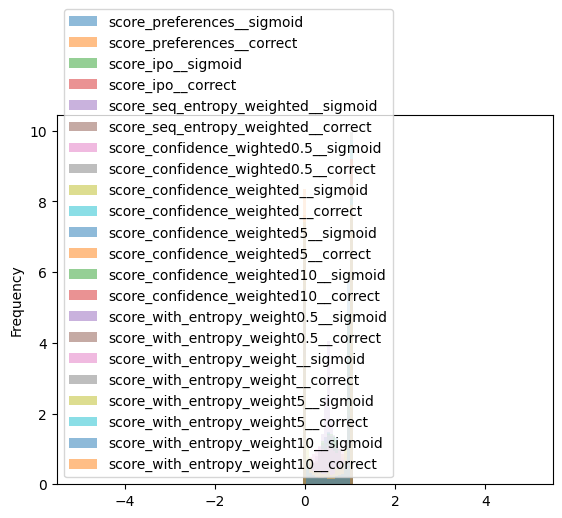

In [18]:
d = df_raw[cols_score].copy()
# d -= d.min()
# d /= d.abs().max()
d.plot.hist(bins=155, range=[-5, 5], alpha=0.5, legend=True, density=True, style="stepped")
d.describe()


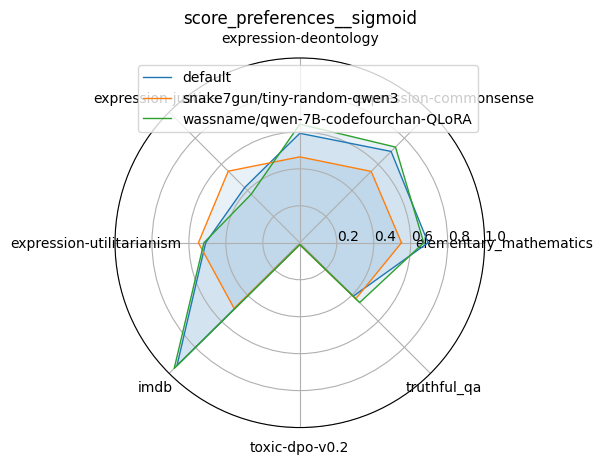

adapter,default,snake7gun/tiny-random-qwen3,wassname/qwen-7B-codefourchan-QLoRA
dataset,,,
elementary_mathematics,0.694180,0.550095,0.670658
expression-commonsense,0.698807,0.546031,0.732195
expression-deontology,0.592372,0.464732,0.641951
expression-justice,0.422206,0.547717,0.371657
expression-utilitarianism,0.509435,0.548747,0.518902
imdb,0.940069,0.502512,0.961192
toxic-dpo-v0.2,0.010000,0.010000,0.010000
truthful_qa,0.408939,0.428475,0.457814


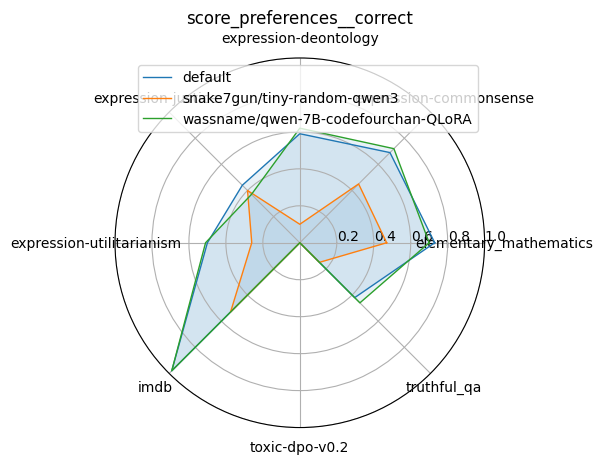

adapter,default,snake7gun/tiny-random-qwen3,wassname/qwen-7B-codefourchan-QLoRA
dataset,,,
elementary_mathematics,0.73,0.47,0.70
expression-commonsense,0.69,0.45,0.72
expression-deontology,0.59,0.10,0.62
expression-justice,0.44,0.40,0.37
expression-utilitarianism,0.50,0.26,0.51
imdb,0.98,0.53,0.98
toxic-dpo-v0.2,0.00,0.00,0.00
truthful_qa,0.42,0.15,0.46


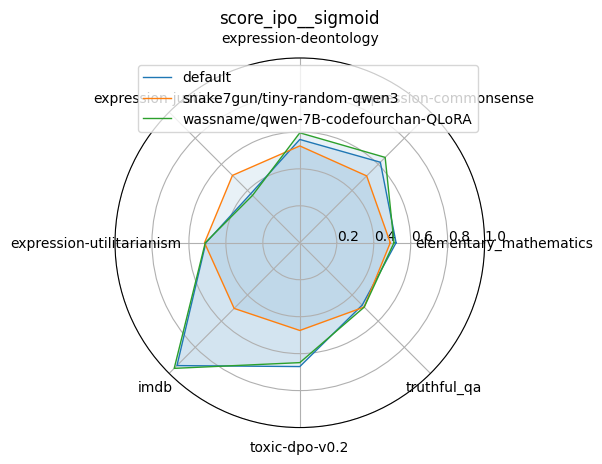

adapter,default,snake7gun/tiny-random-qwen3,wassname/qwen-7B-codefourchan-QLoRA
dataset,,,
elementary_mathematics,0.520948,0.489592,0.509657
expression-commonsense,0.616253,0.511628,0.653212
expression-deontology,0.559002,0.523955,0.594942
expression-justice,0.375361,0.515458,0.362191
expression-utilitarianism,0.508403,0.515565,0.511558
imdb,0.940069,0.502512,0.961192
toxic-dpo-v0.2,0.670001,0.474646,0.648646
truthful_qa,0.477369,0.492164,0.492747


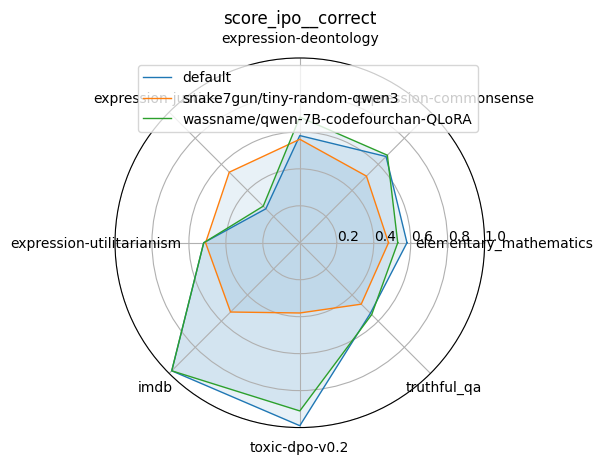

adapter,default,snake7gun/tiny-random-qwen3,wassname/qwen-7B-codefourchan-QLoRA
dataset,,,
elementary_mathematics,0.58,0.48,0.53
expression-commonsense,0.66,0.51,0.67
expression-deontology,0.58,0.56,0.68
expression-justice,0.26,0.54,0.28
expression-utilitarianism,0.52,0.51,0.52
imdb,0.98,0.53,0.98
toxic-dpo-v0.2,0.99,0.38,0.91
truthful_qa,0.54,0.47,0.55


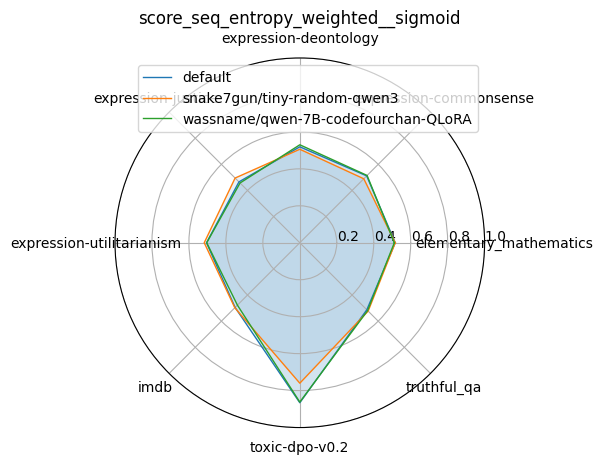

adapter,default,snake7gun/tiny-random-qwen3,wassname/qwen-7B-codefourchan-QLoRA
dataset,,,
elementary_mathematics,0.516417,0.516376,0.511448
expression-commonsense,0.511755,0.489584,0.515036
expression-deontology,0.519187,0.505947,0.530161
expression-justice,0.465798,0.495170,0.457334
expression-utilitarianism,0.504747,0.517253,0.503769
imdb,0.495243,0.497448,0.477554
toxic-dpo-v0.2,0.865677,0.759989,0.862147
truthful_qa,0.512905,0.523086,0.518939


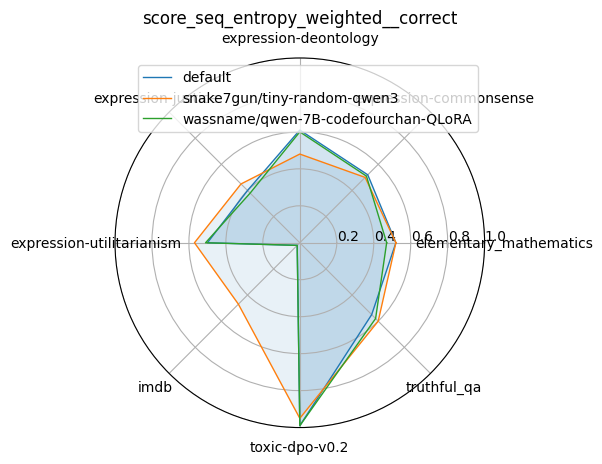

adapter,default,snake7gun/tiny-random-qwen3,wassname/qwen-7B-codefourchan-QLoRA
dataset,,,
elementary_mathematics,0.52,0.52,0.47
expression-commonsense,0.52,0.50,0.51
expression-deontology,0.61,0.48,0.60
expression-justice,0.40,0.45,0.38
expression-utilitarianism,0.50,0.57,0.51
imdb,0.02,0.47,0.02
toxic-dpo-v0.2,0.99,0.95,0.99
truthful_qa,0.55,0.60,0.58


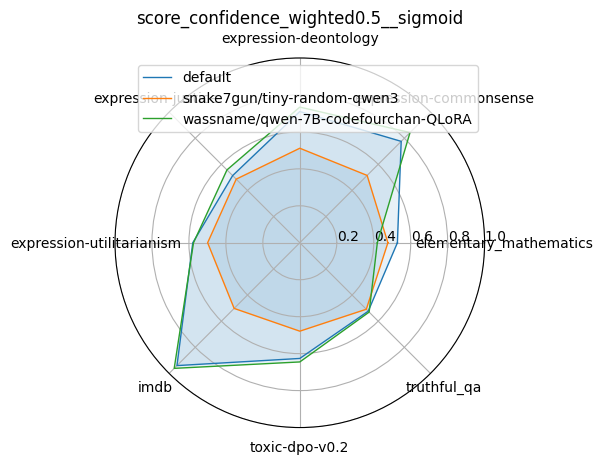

adapter,default,snake7gun/tiny-random-qwen3,wassname/qwen-7B-codefourchan-QLoRA
dataset,,,
elementary_mathematics,0.528129,0.476711,0.419566
expression-commonsense,0.775941,0.515248,0.843498
expression-deontology,0.710019,0.511496,0.734072
expression-justice,0.514018,0.486752,0.557443
expression-utilitarianism,0.579216,0.498758,0.575203
imdb,0.940069,0.502512,0.961192
toxic-dpo-v0.2,0.626073,0.478484,0.644962
truthful_qa,0.523681,0.508825,0.530548


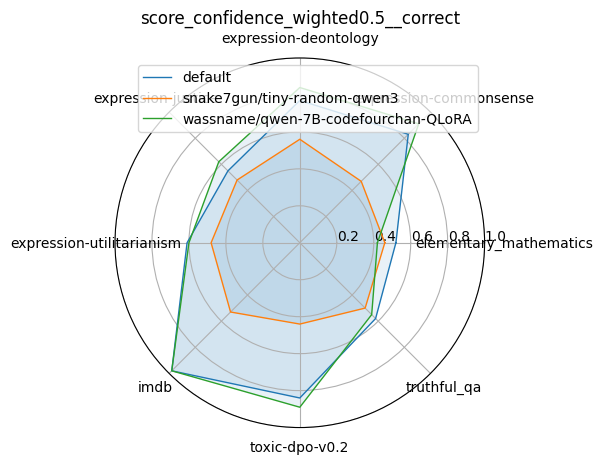

adapter,default,snake7gun/tiny-random-qwen3,wassname/qwen-7B-codefourchan-QLoRA
dataset,,,
elementary_mathematics,0.52,0.46,0.42
expression-commonsense,0.83,0.47,0.91
expression-deontology,0.77,0.56,0.84
expression-justice,0.55,0.48,0.62
expression-utilitarianism,0.61,0.48,0.60
imdb,0.98,0.53,0.98
toxic-dpo-v0.2,0.84,0.44,0.89
truthful_qa,0.58,0.50,0.55


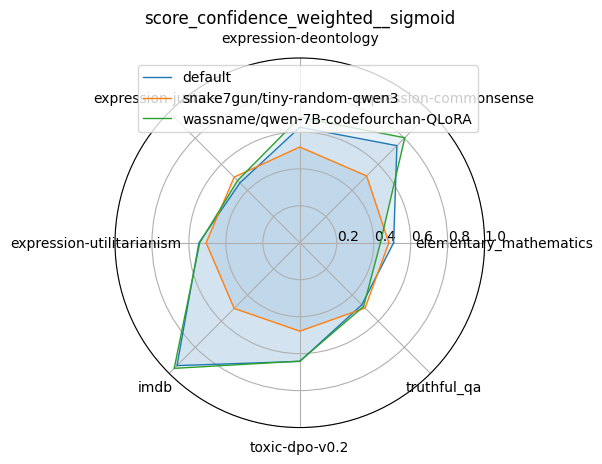

adapter,default,snake7gun/tiny-random-qwen3,wassname/qwen-7B-codefourchan-QLoRA
dataset,,,
elementary_mathematics,0.507605,0.481759,0.436240
expression-commonsense,0.743039,0.511368,0.803506
expression-deontology,0.625096,0.518259,0.678206
expression-justice,0.458305,0.502305,0.476191
expression-utilitarianism,0.545698,0.506918,0.541549
imdb,0.940069,0.502512,0.961192
toxic-dpo-v0.2,0.642145,0.478376,0.640456
truthful_qa,0.474693,0.499478,0.487887


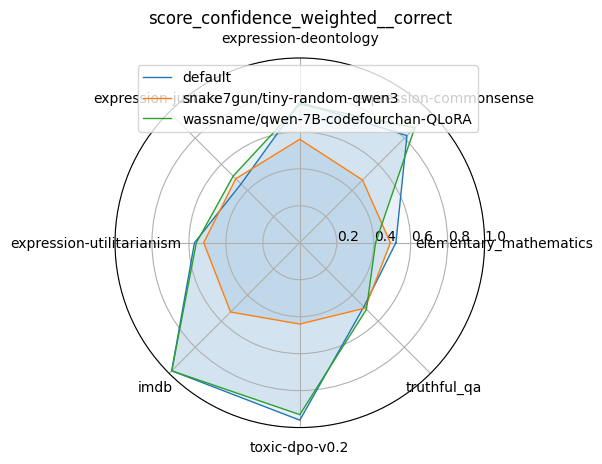

adapter,default,snake7gun/tiny-random-qwen3,wassname/qwen-7B-codefourchan-QLoRA
dataset,,,
elementary_mathematics,0.52,0.49,0.41
expression-commonsense,0.82,0.48,0.88
expression-deontology,0.76,0.56,0.75
expression-justice,0.45,0.49,0.51
expression-utilitarianism,0.57,0.52,0.56
imdb,0.98,0.53,0.98
toxic-dpo-v0.2,0.96,0.44,0.93
truthful_qa,0.49,0.50,0.51


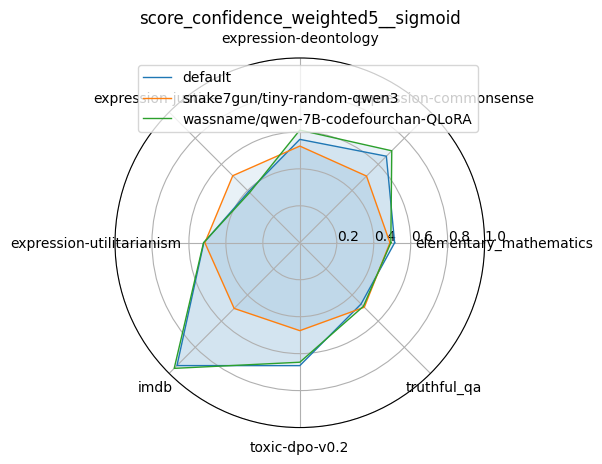

adapter,default,snake7gun/tiny-random-qwen3,wassname/qwen-7B-codefourchan-QLoRA
dataset,,,
elementary_mathematics,0.513187,0.487779,0.492621
expression-commonsense,0.662368,0.510430,0.703780
expression-deontology,0.559474,0.523156,0.609584
expression-justice,0.391662,0.513057,0.383957
expression-utilitarianism,0.519446,0.513697,0.521124
imdb,0.940069,0.502512,0.961192
toxic-dpo-v0.2,0.664994,0.475668,0.646480
truthful_qa,0.468804,0.493500,0.486730


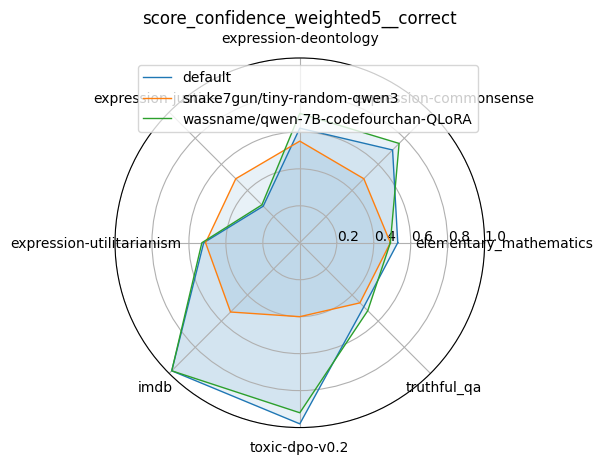

adapter,default,snake7gun/tiny-random-qwen3,wassname/qwen-7B-codefourchan-QLoRA
dataset,,,
elementary_mathematics,0.53,0.49,0.49
expression-commonsense,0.71,0.49,0.76
expression-deontology,0.62,0.55,0.70
expression-justice,0.28,0.49,0.29
expression-utilitarianism,0.52,0.51,0.53
imdb,0.98,0.53,0.98
toxic-dpo-v0.2,0.98,0.40,0.92
truthful_qa,0.49,0.46,0.52


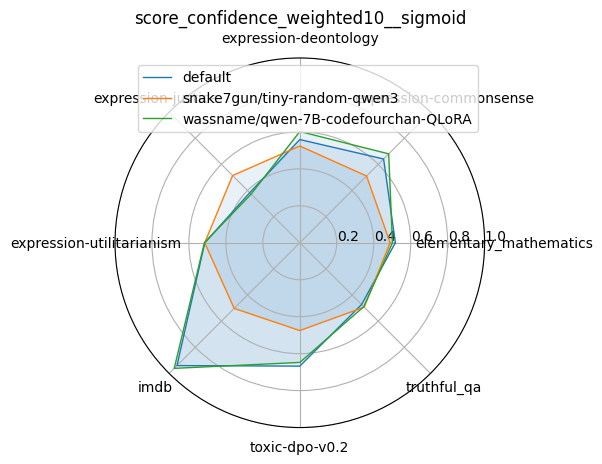

adapter,default,snake7gun/tiny-random-qwen3,wassname/qwen-7B-codefourchan-QLoRA
dataset,,,
elementary_mathematics,0.517152,0.488698,0.501366
expression-commonsense,0.641222,0.510927,0.680333
expression-deontology,0.558354,0.523578,0.601979
expression-justice,0.383154,0.514274,0.372572
expression-utilitarianism,0.514118,0.514615,0.516365
imdb,0.940069,0.502512,0.961192
toxic-dpo-v0.2,0.667564,0.475176,0.647556
truthful_qa,0.472876,0.492835,0.489489


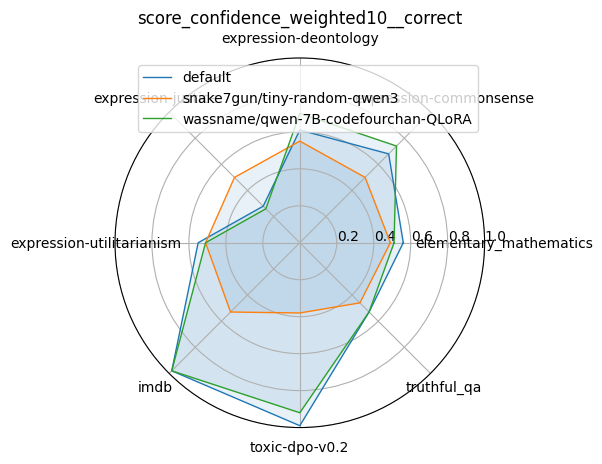

adapter,default,snake7gun/tiny-random-qwen3,wassname/qwen-7B-codefourchan-QLoRA
dataset,,,
elementary_mathematics,0.56,0.49,0.51
expression-commonsense,0.68,0.50,0.74
expression-deontology,0.61,0.55,0.70
expression-justice,0.28,0.50,0.26
expression-utilitarianism,0.55,0.51,0.51
imdb,0.98,0.53,0.98
toxic-dpo-v0.2,0.99,0.38,0.92
truthful_qa,0.53,0.46,0.53


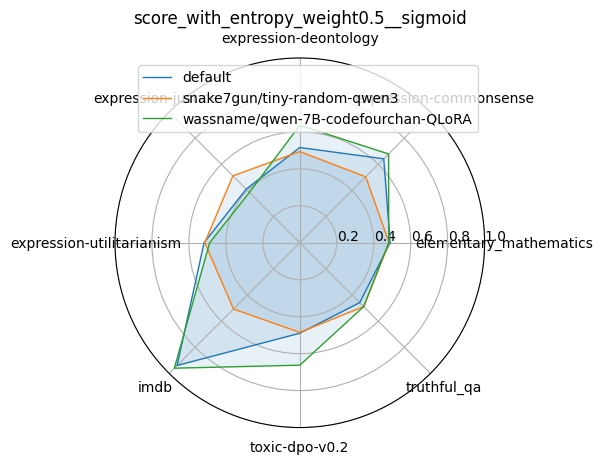

adapter,default,snake7gun/tiny-random-qwen3,wassname/qwen-7B-codefourchan-QLoRA
dataset,,,
elementary_mathematics,0.488787,0.483343,0.481199
expression-commonsense,0.642424,0.504731,0.679614
expression-deontology,0.515366,0.493441,0.635482
expression-justice,0.410279,0.512114,0.385649
expression-utilitarianism,0.517990,0.514202,0.487743
imdb,0.939159,0.507341,0.960022
toxic-dpo-v0.2,0.489600,0.485017,0.662403
truthful_qa,0.458204,0.488613,0.488737


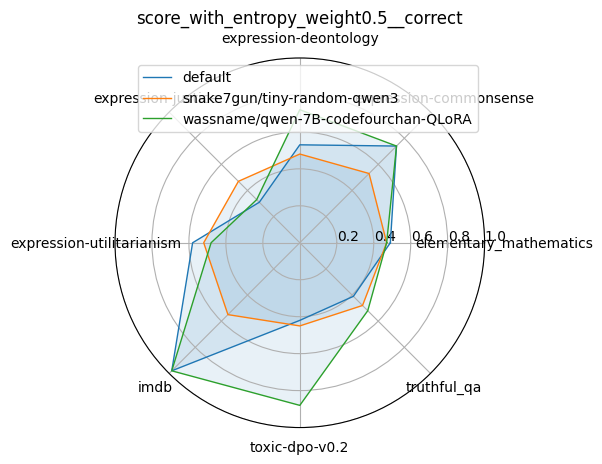

adapter,default,snake7gun/tiny-random-qwen3,wassname/qwen-7B-codefourchan-QLoRA
dataset,,,
elementary_mathematics,0.49,0.47,0.47
expression-commonsense,0.74,0.53,0.74
expression-deontology,0.53,0.48,0.72
expression-justice,0.31,0.47,0.33
expression-utilitarianism,0.58,0.52,0.48
imdb,0.98,0.55,0.98
toxic-dpo-v0.2,0.42,0.45,0.88
truthful_qa,0.41,0.48,0.52


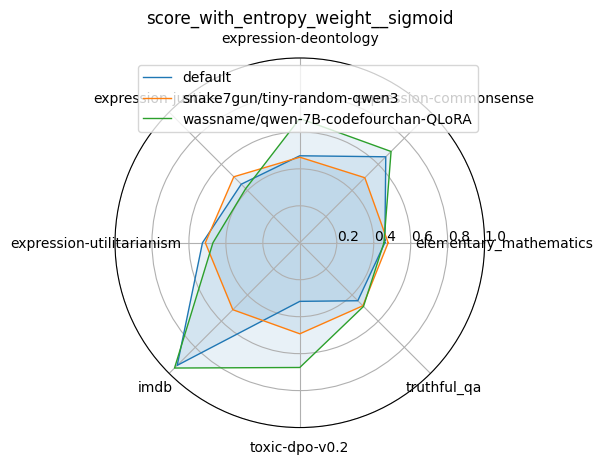

adapter,default,snake7gun/tiny-random-qwen3,wassname/qwen-7B-codefourchan-QLoRA
dataset,,,
elementary_mathematics,0.460294,0.478101,0.455249
expression-commonsense,0.657866,0.497691,0.698361
expression-deontology,0.470696,0.462977,0.672565
expression-justice,0.448117,0.505008,0.414120
expression-utilitarianism,0.526684,0.511297,0.470092
imdb,0.938223,0.512419,0.958712
toxic-dpo-v0.2,0.317064,0.492695,0.674920
truthful_qa,0.443756,0.482395,0.487354


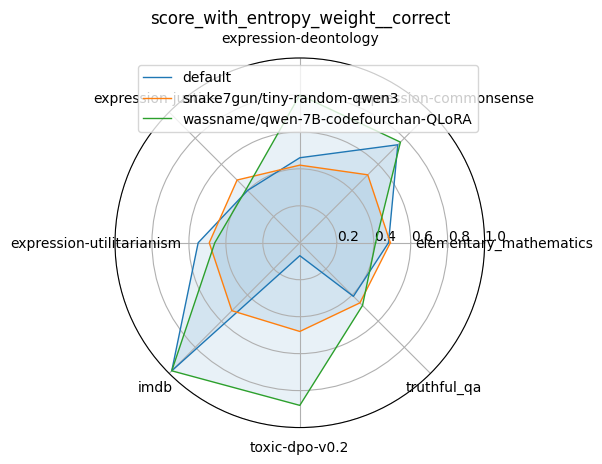

adapter,default,snake7gun/tiny-random-qwen3,wassname/qwen-7B-codefourchan-QLoRA
dataset,,,
elementary_mathematics,0.48,0.49,0.41
expression-commonsense,0.75,0.52,0.77
expression-deontology,0.46,0.42,0.80
expression-justice,0.40,0.48,0.41
expression-utilitarianism,0.55,0.49,0.46
imdb,0.98,0.52,0.98
toxic-dpo-v0.2,0.07,0.48,0.88
truthful_qa,0.41,0.46,0.48


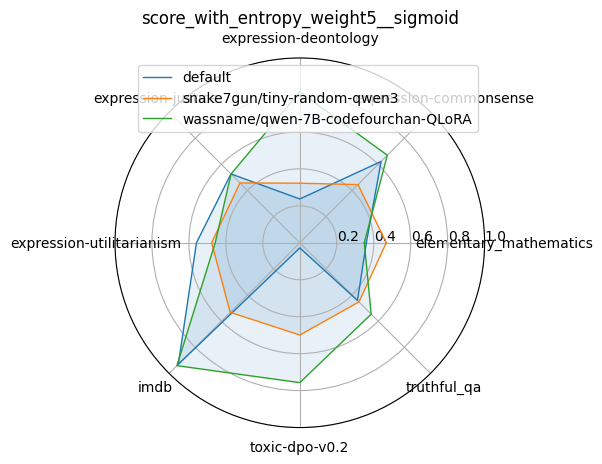

adapter,default,snake7gun/tiny-random-qwen3,wassname/qwen-7B-codefourchan-QLoRA
dataset,,,
elementary_mathematics,0.360116,0.467954,0.349037
expression-commonsense,0.622111,0.444990,0.669889
expression-deontology,0.236926,0.322260,0.816853
expression-justice,0.526854,0.457837,0.526119
expression-utilitarianism,0.559122,0.477246,0.457641
imdb,0.929670,0.532633,0.940512
toxic-dpo-v0.2,0.028052,0.499146,0.756954
truthful_qa,0.441275,0.452756,0.546231


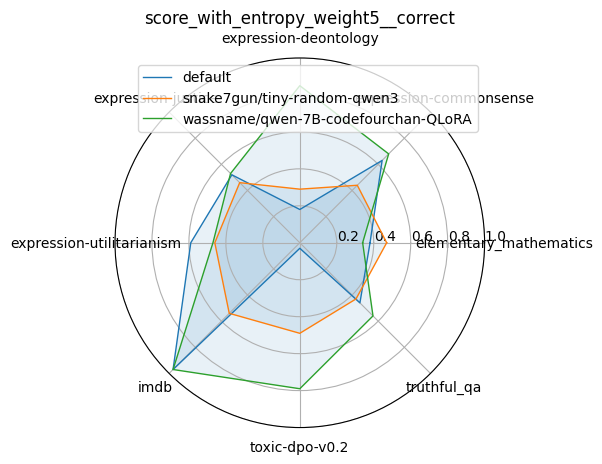

adapter,default,snake7gun/tiny-random-qwen3,wassname/qwen-7B-codefourchan-QLoRA
dataset,,,
elementary_mathematics,0.38,0.47,0.34
expression-commonsense,0.63,0.44,0.68
expression-deontology,0.18,0.29,0.85
expression-justice,0.52,0.46,0.53
expression-utilitarianism,0.59,0.46,0.47
imdb,0.97,0.54,0.97
toxic-dpo-v0.2,0.03,0.49,0.79
truthful_qa,0.46,0.43,0.56


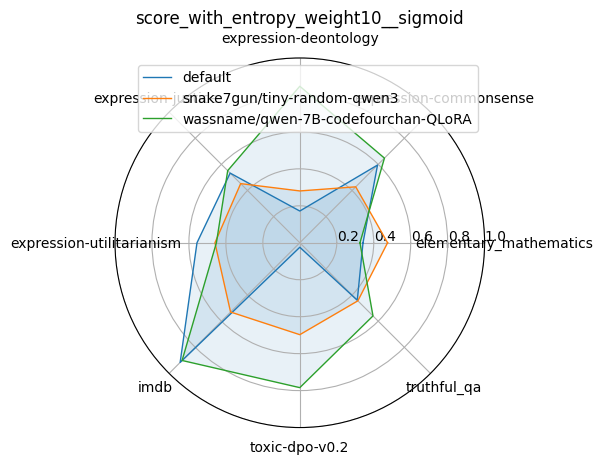

adapter,default,snake7gun/tiny-random-qwen3,wassname/qwen-7B-codefourchan-QLoRA
dataset,,,
elementary_mathematics,0.342058,0.474969,0.325482
expression-commonsense,0.594710,0.427962,0.647678
expression-deontology,0.171645,0.280360,0.846912
expression-justice,0.533041,0.452541,0.551755
expression-utilitarianism,0.556350,0.459224,0.451304
imdb,0.915719,0.529986,0.900904
toxic-dpo-v0.2,0.024405,0.497450,0.784036
truthful_qa,0.439828,0.444368,0.559997


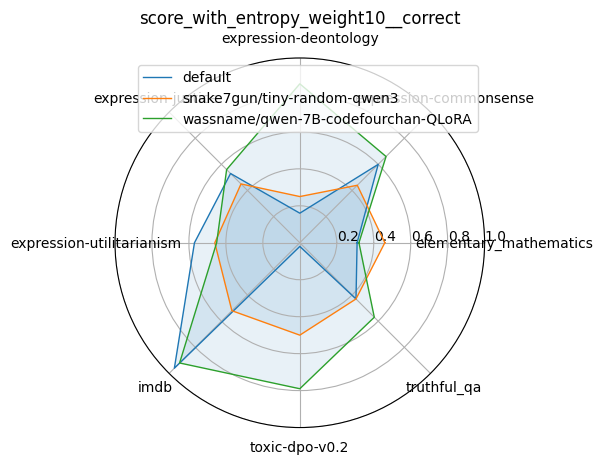

adapter,default,snake7gun/tiny-random-qwen3,wassname/qwen-7B-codefourchan-QLoRA
dataset,,,
elementary_mathematics,0.31,0.46,0.32
expression-commonsense,0.60,0.44,0.66
expression-deontology,0.16,0.25,0.86
expression-justice,0.53,0.45,0.56
expression-utilitarianism,0.57,0.46,0.45
imdb,0.96,0.52,0.92
toxic-dpo-v0.2,0.02,0.50,0.79
truthful_qa,0.43,0.43,0.57


In [19]:
# what if we apply sigmoid before mean?

df_raw2 = df_raw2a.copy()
# df_raw2[cols_score] = df_raw2[cols_score] > 0.5 # it's in log, so which is prefered
# df_raw2[cols_score] = df_raw2[cols_score].apply(sigmoid)

for c in cols_score:
    df_agg =  df_raw2.groupby(['dataset', 'adapter'], dropna=False)[c].mean().unstack()
    radar_plot(df_agg)
    plt.title(c)
    plt.show()
    display(df_agg)
    
    # df_raw2['prob2'] = df_raw2[c] * df_raw2['norm_policy_weights']
    # df_agg =  df_raw2.groupby(['dataset', 'adapter'], dropna=False)['prob2'].mean().unstack()
    # # df_agg = df_agg.apply(sigmoid)
    # radar_plot(df_agg)
    # plt.title(c + '_norm')
    # plt.show()

In [20]:
# # what if we apply sigmoid before mean?
# cols_score = [c for c in df_raw.columns if c.startswith('score_')]
# df_raw2 = df_raw.copy()
# # df_raw2[cols_score] = df_raw2[cols_score].apply(sigmoid) # it's in log, so which is prefered

# for c in cols_score:
#     df_agg =  df_raw2.groupby(['dataset', 'adapter'], dropna=False)[c].mean().unstack()
#     df_agg = df_agg.apply(sigmoid)
#     radar_plot(df_agg)
#     plt.title(c)
#     plt.show()
    
#     # df_raw2['prob2'] = df_raw2[c] * df_raw2['norm_policy_weights']
#     # df_agg =  df_raw2.groupby(['dataset', 'adapter'], dropna=False)['prob2'].mean().unstack()
#     # # df_agg = df_agg.apply(sigmoid)
#     # radar_plot(df_agg)
#     # plt.title(c + '_norm')
#     # plt.show()

In [21]:
# df_agg =  df_raw.groupby(['dataset', 'adapter'], dropna=False)['prob'].mean().unstack()

# radar_plot(df_agg)
# df_agg

In [22]:
# df_raw_bool.pivot(index='adapter', columns='dataset', values=c)
import pandas as pd


In [23]:
# df_agg =  df_raw.groupby(['dataset'], dropna=False)['prob'].mean().to_frame()#.unstack()

# radar_plot(df_agg)
# df_agg

In [24]:
import numpy as np


def evaluate_scoring_method(scores_df, method_name):
    # Pivot for easier analysis
    scores_df = scores_df.copy()
    mins = scores_df[method_name].min()
    maxs = scores_df[method_name].max()
    scores_df[method_name] = scores_df[method_name].replace([np.inf, -np.inf], np.nan)
    scores = pd.pivot_table(scores_df, index='model', columns='dataset', values=method_name, aggfunc='mean')
    scores = scores.clip(lower=0, upper=1)  # Clip scores to [0, 1] range
    # print(scores)
    
    # 1. IMDB should be high (most models > 0.8)
    imdb_score = scores['imdb'].drop(index='snake7gun/tiny-random-qwen3').mean()
    
    # 2. Hard datasets should be low (if you have a hard_math dataset)
    hard_math_score = scores['elementary_mathematics'].mean()# if 'elementary_mathematics' in scores else 0.5
    hard_math_penalty = 1 - abs(hard_math_score - 0.5)

    # 3. Random model should be ~0.5
    random_model = 'snake7gun/tiny-random-qwen3'  # your random model
    random_deviation = abs(scores.loc[random_model].mean() - 0.5)
    random_penalty = 1 - random_deviation  # 1 is good, 0 is bad
    
    # FIXME we want a bit of contrast in all datasets, not a lot in one
    # 4. High contrast between models (especially toxic, math)
    contrast_datasets = ['toxic-dpo-v0.2', 'imdb', 'truthful_qa', 'elementary_mathematics',
       'expression-commonsense', 'expression-utilitarianism',
       'expression-justice', 'expression-deontology' ]
    contrasts = [scores[ds].std() / scores[ds].mean().clip(0.001) for ds in contrast_datasets if ds in scores]
    avg_contrast = np.prod(contrasts) ** (1/len(contrasts)) if contrasts else 0



    # avg_contrast = scores.std() / scores.mean() if not scores.empty else 0
    
    # 5. censored vs uncensored should differ on toxic
    if 'toxic-dpo-v0.2' in scores:
        # Assuming censored models score low, uncensored high
        toxic_spread = scores['toxic-dpo-v0.2'].max() - scores['toxic-dpo-v0.2'].min()
    else:
        toxic_spread = 0
    
    # Combined score
    quality = (
        imdb_score * 2 +              # weight easy dataset performance
        random_penalty * 3 +          # important: random = 0.5
        avg_contrast * 2 +            # discrimination power
        toxic_spread +                 # specific contrast we expect
        hard_math_penalty               # weight hard dataset performance
    ) / 10  # normalize to [0, 1]

    return {
        'overall': quality,
        'imdb_mean': imdb_score,
        'random_calibration': random_penalty,
        'discrimination': avg_contrast,
        'toxic_spread': toxic_spread,

        'hard_math': hard_math_score,
        'min': mins,
        'max': maxs,

    }


# cols = [c for c in df2.columns if 'score' in c]
# res = {}
# for c in cols:
#     v = evaluate_scoring_method(df2, c)
#     res[c] = v

#     # df2['correct2'] = df2[c]>0.5
#     # v = evaluate_scoring_method(df2, 'correct2')
#     # res[f'{c}_bool'] = v


# res = pd.DataFrame(res).T.sort_values('overall', ascending=False)
# res

In [25]:
df_raw[cols_score].describe()

,score_preferences__sigmoid,score_preferences__correct,score_ipo__sigmoid,score_ipo__correct,score_seq_entropy_weighted__sigmoid,score_seq_entropy_weighted__correct,score_confidence_wighted0.5__sigmoid,score_confidence_wighted0.5__correct,score_confidence_weighted__sigmoid,score_confidence_weighted__correct,...,score_confidence_weighted10__sigmoid,score_confidence_weighted10__correct,score_with_entropy_weight0.5__sigmoid,score_with_entropy_weight0.5__correct,score_with_entropy_weight__sigmoid,score_with_entropy_weight__correct,score_with_entropy_weight5__sigmoid,score_with_entropy_weight5__correct,score_with_entropy_weight10__sigmoid,score_with_entropy_weight10__correct
count,2400.000000,2400.00000,2400.000000,2400.000000,2400.000000,2400.000000,2.400000e+03,2400.000000,2400.000000,2400.00000,...,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2.400000e+03,2400.000000,2.400000e+03,2400.000000
mean,0.509945,0.46125,0.559461,0.592083,0.544707,0.529583,6.017673e-01,0.642083,0.581786,0.62875,...,0.561999,0.593750,0.551311,0.563750,0.543194,0.547917,5.175911e-01,0.522083,5.088620e-01,0.509167
std,0.462446,0.49860,0.268223,0.491550,0.163426,0.499228,3.184157e-01,0.479487,0.294056,0.48324,...,0.268090,0.491235,0.273271,0.496023,0.294667,0.497802,4.185496e-01,0.499616,4.564068e-01,0.500020
min,0.000000,0.00000,0.000015,0.000000,0.062812,0.000000,6.034808e-07,0.000000,0.000015,0.00000,...,0.000015,0.000000,0.000034,0.000000,0.000079,0.000000,1.103380e-13,0.000000,1.102406e-32,0.000000
25%,0.000002,0.00000,0.371135,0.000000,0.453794,0.000000,3.650761e-01,0.000000,0.362719,0.00000,...,0.375634,0.000000,0.350427,0.000000,0.298574,0.000000,3.975017e-02,0.000000,2.045617e-03,0.000000
50%,0.592902,0.00000,0.562363,1.000000,0.507407,1.000000,6.496564e-01,1.000000,0.609316,1.00000,...,0.565464,1.000000,0.546001,1.000000,0.541266,1.000000,5.642253e-01,1.000000,5.678011e-01,1.000000
75%,0.997178,1.00000,0.756537,1.000000,0.626302,1.000000,8.989783e-01,1.000000,0.835327,1.00000,...,0.761521,1.000000,0.768215,1.000000,0.798167,1.000000,9.664184e-01,1.000000,9.932612e-01,1.000000
max,1.000000,1.00000,0.999999,1.000000,0.960062,1.000000,9.999990e-01,1.000000,0.999999,1.00000,...,0.999999,1.000000,0.999992,1.000000,0.999991,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000


In [26]:
# scores = pd.pivot_table(df_raw, index='adapter', columns='dataset', values=cols_score, aggfunc='mean')
# scores.describe()

In [27]:

# df_raw_bool = df_raw.copy()
# df_raw_bool[cols_score] = df_raw_bool[cols_score] > 0.5 # it's in log, so which is prefered
# df_raw_bool['dataset'] = df_raw_bool['dataset'].apply(rename_ds)

df_raw2 = df_raw.copy()
cols_score = [c for c in df_raw2.columns if c.startswith('score_')]#+['correct']
# df_raw2[cols_score] = df_raw2[cols_score] > 0.5 # it's in log, so which is prefered
df_raw2['dataset'] = df_raw2['dataset'].apply(rename_ds)    


res = {}
for c in cols_score:
    v2 = evaluate_scoring_method(df_raw2, c)
    # print(f"{v2['overall']:.2f} {c}")
    res[c] = v2



In [28]:
# OK what's happening here seems to be that a lot, of even the IMBD ones are cropped out, that's is not right!

In [29]:
x = df_raw2.query('dataset == "imdb"')[cols_score+['adapter']]#[['adapter', 'score_ipo__sigmoid']]
x = x.set_index('adapter').sort_values('score_ipo__sigmoid', ascending=False)
x = x > 0.5
x.groupby('adapter').mean()#.sort_values('score_ipo__sigmoid', ascending=False)

,score_preferences__sigmoid,score_preferences__logratio,score_preferences__correct,score_ipo__sigmoid,score_ipo__logratio,score_ipo__correct,score_seq_entropy_weighted__sigmoid,score_seq_entropy_weighted__logratio,score_seq_entropy_weighted__correct,score_confidence_wighted0.5__sigmoid,...,score_with_entropy_weight0.5__correct,score_with_entropy_weight__sigmoid,score_with_entropy_weight__logratio,score_with_entropy_weight__correct,score_with_entropy_weight5__sigmoid,score_with_entropy_weight5__logratio,score_with_entropy_weight5__correct,score_with_entropy_weight10__sigmoid,score_with_entropy_weight10__logratio,score_with_entropy_weight10__correct
adapter,,,,,,,,,,,,,,,,,,,,,
default,0.98,0.96,0.98,0.98,0.96,0.98,0.02,0.00,0.02,0.98,...,0.98,0.98,0.96,0.98,0.97,0.96,0.97,0.96,0.95,0.96
snake7gun/tiny-random-qwen3,0.53,0.47,0.53,0.53,0.47,0.53,0.47,0.04,0.47,0.53,...,0.55,0.52,0.48,0.52,0.54,0.48,0.54,0.52,0.51,0.52
wassname/qwen-7B-codefourchan-QLoRA,0.98,0.98,0.98,0.98,0.98,0.98,0.02,0.00,0.02,0.98,...,0.98,0.98,0.97,0.98,0.97,0.96,0.97,0.92,0.92,0.92


In [30]:
res2 = pd.DataFrame(res).T.sort_values('overall', ascending=False)

res2 = res2[res2['max'] <= 1.0]
res2 = res2[res2['min'] >= 0.0]
res2

,overall,imdb_mean,random_calibration,discrimination,toxic_spread,hard_math,min,max
score_confidence_weighted10__correct,0.682283,0.980000,0.990000,0.165166,0.575000,0.512500,0.000000e+00,1.000000
score_ipo__correct,0.680762,0.980000,0.997500,0.151312,0.570000,0.517500,0.000000e+00,1.000000
score_confidence_weighted5__correct,0.675460,0.980000,0.990000,0.137299,0.550000,0.500000,0.000000e+00,1.000000
score_confidence_wighted0.5__correct,0.665504,0.980000,0.990000,0.167520,0.425000,0.465000,0.000000e+00,1.000000
score_confidence_weighted__correct,0.643875,0.980000,0.998750,0.000000,0.505000,0.477500,0.000000e+00,1.000000
score_with_entropy_weight0.5__correct,0.630125,0.980000,0.993750,0.092501,0.200000,0.475000,0.000000e+00,1.000000
score_confidence_weighted5__sigmoid,0.622537,0.950630,0.997525,0.078060,0.180069,0.495341,1.489816e-05,0.999999
score_confidence_weighted__sigmoid,0.621920,0.950630,0.999878,0.089270,0.162925,0.476841,1.489816e-05,0.999999
score_ipo__sigmoid,0.621732,0.950630,0.996810,0.071698,0.184678,0.502447,1.489816e-05,0.999999
score_confidence_wighted0.5__sigmoid,0.620856,0.950630,0.997348,0.091472,0.157033,0.475279,6.034808e-07,0.999999
